In [ ]:
# Introducción a Minería de Datos en Python (Google Colab)


In [10]:
# --------------------------------------------------
# Celda 1: Importación de librerías necesarias
# --------------------------------------------------
# pandas: para manipulación de datos en DataFrame
# numpy: para operaciones numéricas
# matplotlib.pyplot y seaborn: para visualización gráfica
# sklearn.datasets: para cargar datasets de ejemplo
import pandas as pd                      # para estructuras DataFrame
import numpy as np                       # para operaciones numéricas
import matplotlib.pyplot as plt          # para gráficos básicos
import seaborn as sns                    # para gráficos estadísticos
from scipy import stats                  # para detección de outliers
from sklearn import datasets             # para datasets de ejemplo
from sklearn.model_selection import train_test_split  # para partición de datos
from sklearn.preprocessing import StandardScaler       # para escalado de características


# Asegurar que los gráficos se muestren en línea
%matplotlib inline


**La flor IRIS**

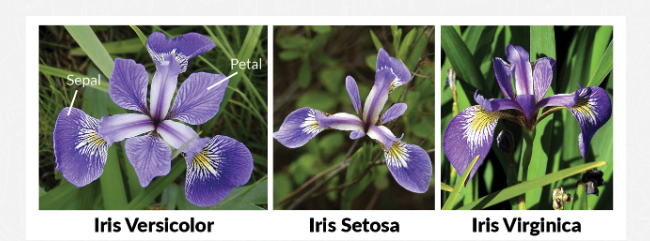

**Ejemplo de CLASIFICACION**

In [2]:
# --------------------------------------------------
# Celda 2: Carga de un dataset de ejemplo (Iris)
# --------------------------------------------------
# Usamos el conjunto Iris, clásico en minería de datos,
# que contiene 150 muestras de flores con 4 características
iris = datasets.load_iris()

# Convertimos a DataFrame de pandas incluyendo nombres de columnas
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Añadimos la columna de la especie (target) como categórica
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# Mostrar las primeras filas para comprobar que todo se cargó bien
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


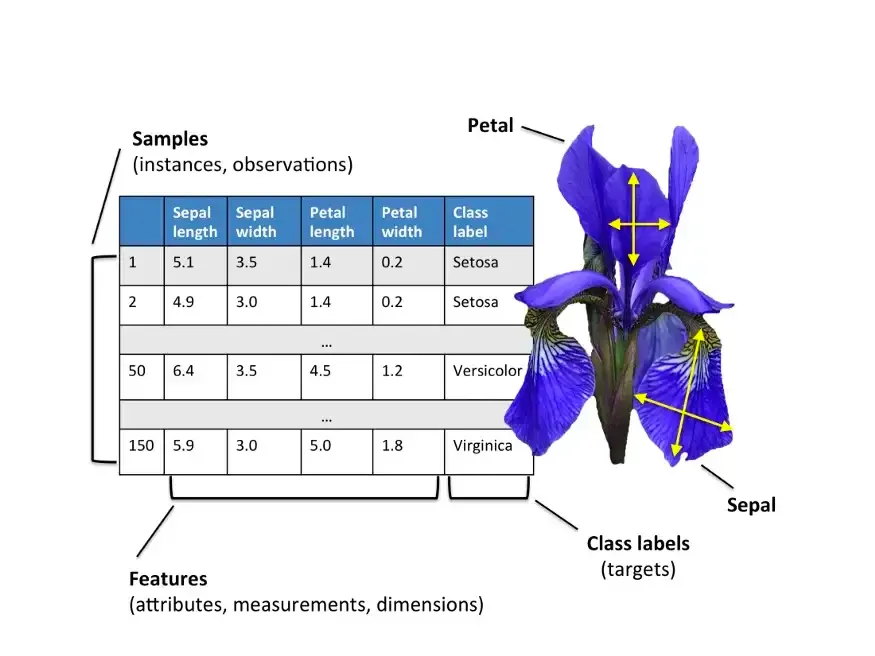

In [3]:
# --------------------------------------------------
# Celda 3: Exploración inicial del DataFrame
# --------------------------------------------------
# 1) info(): tipo de datos y valores no nulos
print("Información del DataFrame:")
df.info()

# 2) describe(): estadísticas descriptivas básicas para variables numéricas
print("\nEstadísticos descriptivos:")
df.describe()


Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   sepal length (cm)  150 non-null    float64 
 1   sepal width (cm)   150 non-null    float64 
 2   petal length (cm)  150 non-null    float64 
 3   petal width (cm)   150 non-null    float64 
 4   species            150 non-null    category
dtypes: category(1), float64(4)
memory usage: 5.1 KB

Estadísticos descriptivos:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
# --------------------------------------------------
# Celda 4: Estadísticas básicas
# --------------------------------------------------
# Media de cada variable numérica
print("Medias de las características:")
print(df.mean(numeric_only=True))

# Mediana de cada variable numérica
print("\nMedianas de las características:")
print(df.median(numeric_only=True))

# Modo de cada variable numérica
print("\nModos de las características:")
print(df.mode(numeric_only=True).iloc[0])

# Matriz de correlación entre variables numéricas
print("\nMatriz de correlación:")
# Excluir la columna 'species' antes de calcular la correlación
corr_matrix = df.drop('species', axis=1).corr()
print(corr_matrix)

Medias de las características:
sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64

Medianas de las características:
sepal length (cm)    5.80
sepal width (cm)     3.00
petal length (cm)    4.35
petal width (cm)     1.30
dtype: float64

Modos de las características:
sepal length (cm)    5.0
sepal width (cm)     3.0
petal length (cm)    1.4
petal width (cm)     0.2
Name: 0, dtype: float64

Matriz de correlación:
                   sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000         -0.117570           0.871754   
sepal width (cm)           -0.117570          1.000000          -0.428440   
petal length (cm)           0.871754         -0.428440           1.000000   
petal width (cm)            0.817941         -0.366126           0.962865   

                   petal width (cm)  
sepal length (cm)          0.817941  
sepal width (cm)          -0.366126  
pe

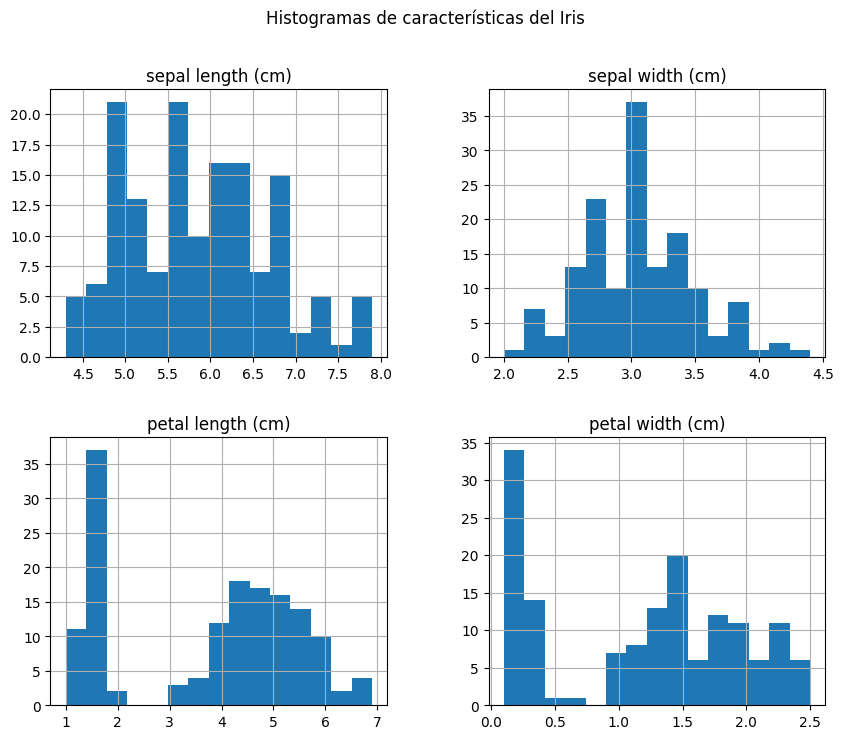

In [6]:
# --------------------------------------------------
# Celda 5: Visualización de distribuciones
# --------------------------------------------------
# Histograma de cada característica numérica
df.hist(bins=15, figsize=(10, 8))
plt.suptitle("Histogramas de características del Iris")
plt.show()


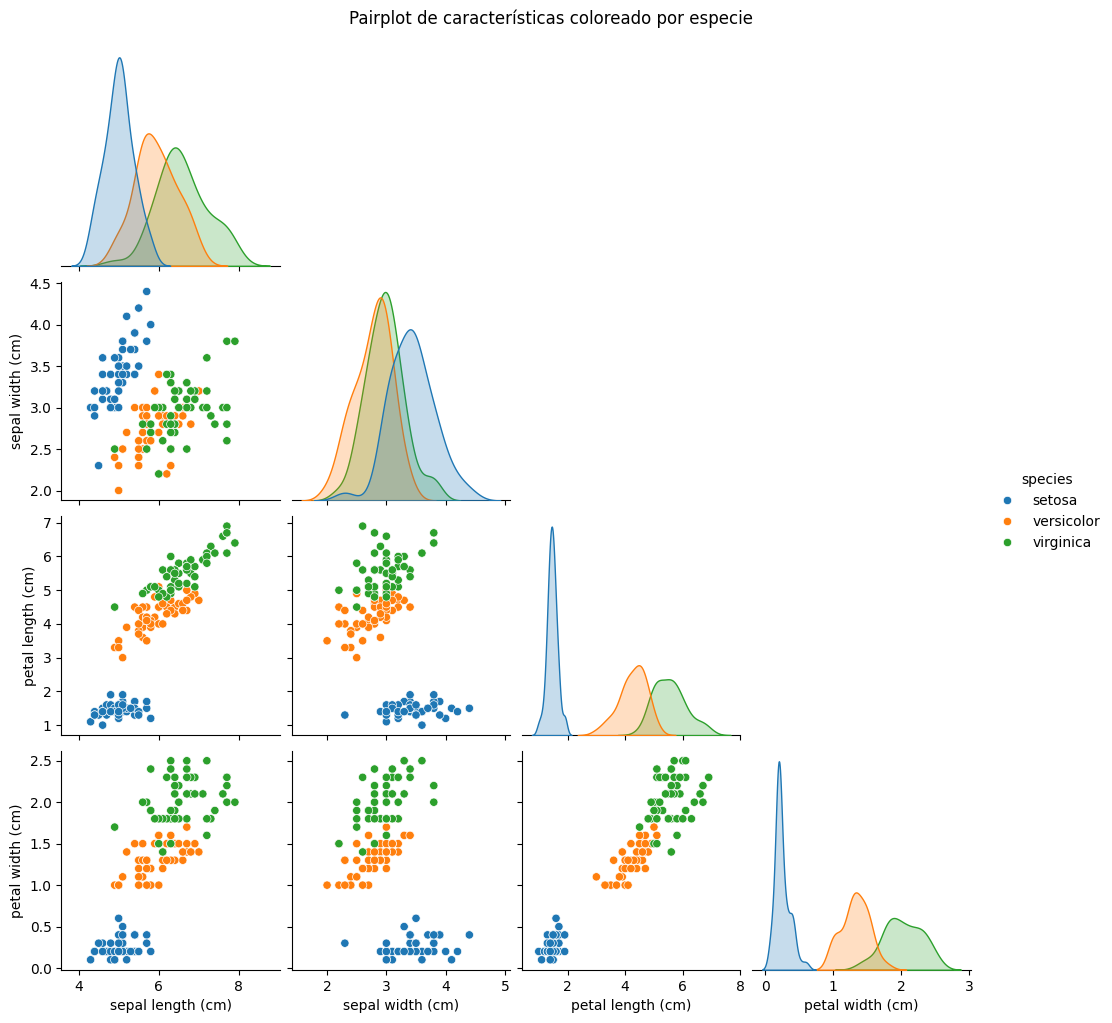

In [7]:
# --------------------------------------------------
# Celda 6: Scatter matrix (gráfica de pares)
# --------------------------------------------------
# Usamos seaborn.pairplot para ver relaciones bivariadas
sns.pairplot(df, hue='species', corner=True)
plt.suptitle("Pairplot de características coloreado por especie", y=1.02)
plt.show()


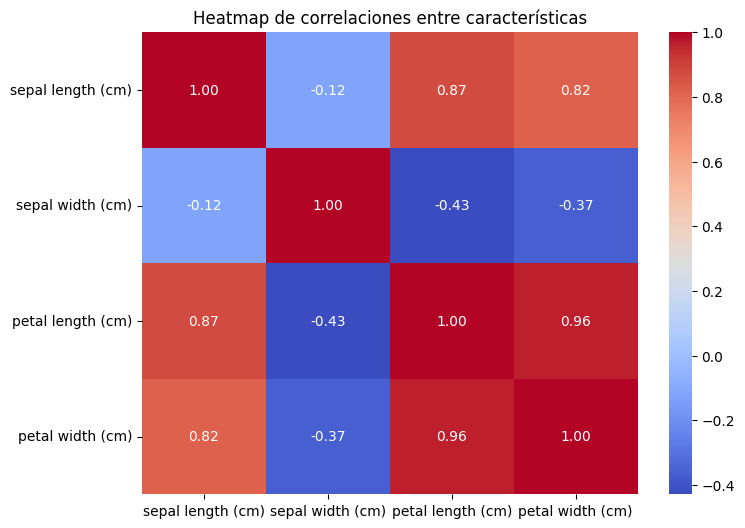

In [8]:
# --------------------------------------------------
# Celda 7: Mapa de calor de correlaciones
# --------------------------------------------------
# Visualizamos la matriz de correlación con un heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Heatmap de correlaciones entre características")
plt.show()



In [11]:
# --------------------------------------------------
# Celda 8: Detección y tratamiento de outliers con z-score
# --------------------------------------------------
# Calculamos z-scores para variables numéricas
z_scores = np.abs(stats.zscore(df.iloc[:, :4]))
# Identificamos filas donde alguna variable supera |z|>3
outlier_mask = (z_scores > 3).any(axis=1)
print(f"Número de outliers detectados: {outlier_mask.sum()}")
# Creamos DataFrame sin outliers para el resto del análisis
df_clean = df.loc[~outlier_mask].reset_index(drop=True)
print(f"Tamaño original: {df.shape[0]}, tras limpieza: {df_clean.shape[0]}")


Número de outliers detectados: 1
Tamaño original: 150, tras limpieza: 149


In [12]:
# --------------------------------------------------
# Celda 9: Escalado de características
# --------------------------------------------------
scaler = StandardScaler()
X_clean = df_clean.iloc[:, :4]            # características numéricas
X_scaled = scaler.fit_transform(X_clean)   # ajuste y transformación
df_scaled = pd.DataFrame(X_scaled, columns=iris.feature_names)
df_scaled['species'] = df_clean['species'] # reinsertamos la categoría
df_scaled.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,-0.898927,1.071184,-1.351829,-1.323014,setosa
1,-1.140478,-0.114599,-1.351829,-1.323014,setosa
2,-1.382029,0.359714,-1.408792,-1.323014,setosa
3,-1.502804,0.122557,-1.294865,-1.323014,setosa
4,-1.019702,1.308340,-1.351829,-1.323014,setosa
